# **PREDICTING ENERGY CONSUMPTION OF ELETRIC VEHICLES**


<p style="font-size:20px">The aim of this model is to predict the energy consumption of a eletric vehicle based on its characteristics.</p>

In [89]:
import numpy as np
import matplotlib as plt
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from pandasql import sqldf
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score ,KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [90]:
pip install pandasql

Note: you may need to restart the kernel to use updated packages.


In [91]:
df = pd.read_csv(r"F:\collage\Reg_model\data\electric_car.csv")

In [92]:
df.head()

,carFullName,make,model,MinimalPrice,EnginePower,MaximumTorque,TypeOfBrakes,DriveType,BatteryCapacity,Range,...,PermissableGrossWeight,MaximumLoadCapacity,NumberOfSeats,Number of doors,TireSize,MaximumSpeed,BootCapacity,Acceleration,MaximumDCchargingPower,MeanEnergyconsumption
0,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95.0,438,...,3130.0,640.0,5,5,19,200,660.0,5.7,150,24.45
1,Audi e-tron 50 quattro,Audi,e-tron 50 quattro,308400,313,540,disc (front + rear),4WD,71.0,340,...,3040.0,670.0,5,5,19,190,660.0,6.8,150,23.80
2,Audi e-tron S quattro,Audi,e-tron S quattro,414900,503,973,disc (front + rear),4WD,95.0,364,...,3130.0,565.0,5,5,20,210,660.0,4.5,150,27.55
3,Audi e-tron Sportback 50 quattro,Audi,e-tron Sportback 50 quattro,319700,313,540,disc (front + rear),4WD,71.0,346,...,3040.0,640.0,5,5,19,190,615.0,6.8,150,23.30
4,Audi e-tron Sportback 55 quattro,Audi,e-tron Sportback 55 quattro,357000,360,664,disc (front + rear),4WD,95.0,447,...,3130.0,670.0,5,5,19,200,615.0,5.7,150,23.85


In [93]:
# Dimension of data
df.shape

(53, 25)

In [94]:
# Structure of data
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   carFullName             53 non-null     object 
 1   make                    53 non-null     object 
 2   model                   53 non-null     object 
 3   MinimalPrice            53 non-null     int64  
 4   EnginePower             53 non-null     int64  
 5   MaximumTorque           53 non-null     int64  
 6   TypeOfBrakes            52 non-null     object 
 7   DriveType               53 non-null     object 
 8   BatteryCapacity         53 non-null     float64
 9   Range                   53 non-null     int64  
 10  Wheelbase               53 non-null     float64
 11  Length                  53 non-null     float64
 12  Width                   53 non-null     float64
 13  Height                  53 non-null     float64
 14  MinimalEmptyWeight      53 non-null     int6

In [95]:
# Summary of data
print(df.describe())


        MinimalPrice  EnginePower  MaximumTorque  BatteryCapacity       Range  \
count      53.000000    53.000000      53.000000        53.000000   53.000000   
mean   246158.509434   269.773585     460.037736        62.366038  376.905660   
std    149187.485190   181.298589     261.647000        24.170913  118.817938   
min     82050.000000    82.000000     160.000000        17.600000  148.000000   
25%    142900.000000   136.000000     260.000000        40.000000  289.000000   
50%    178400.000000   204.000000     362.000000        58.000000  364.000000   
75%    339480.000000   372.000000     640.000000        80.000000  450.000000   
max    794000.000000   772.000000    1140.000000       100.000000  652.000000   

        Wheelbase      Length       Width      Height  MinimalEmptyWeight  \
count   53.000000   53.000000   53.000000   53.000000           53.000000   
mean   273.581132  442.509434  186.241509  155.422642         1868.452830   
std     22.740518   48.863280   14.2806

# NA Treatment

In [96]:
# number of NA's
df.isnull().sum().sum()

30

In [97]:
# Number of rows with NA
df[df.isnull().any(axis=1)].shape[0]

11

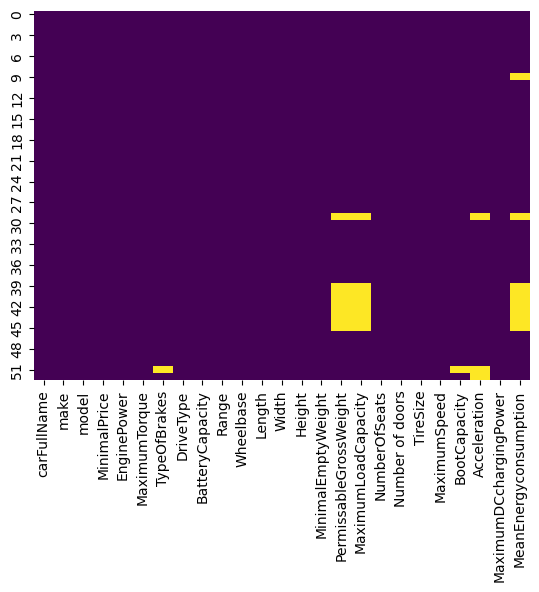

In [98]:
# Visualization of missing data
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

In [99]:
# percent of not complet case
total_rows = df.shape[0]
incomplete_rows = df[df.isnull().any(axis=1)].shape[0]
percentage_incomplete = (incomplete_rows / total_rows) * 100
print(f"Total percentage of incomplete cases: {percentage_incomplete:.2f}%")


Total percentage of incomplete cases: 20.75%


<p style="font-size:20px">As we can see 20% of data are incomplete and the majority of them are in the energy consumption column, so the decision made here is to omit all the rows with missing values</p>

In [100]:
df = df.dropna()
df.isna().sum().sum()

0

<p style="font-size:20px">Removing the Car full name, the manufacturer (Make) and Model. The manufacturer will be desconsidered because there are many cars with only one model in the dataframe </p>

In [101]:
# table with the manufacturers count
df.iloc[:, 1].value_counts()

Audi             6
Porsche          4
Volkswagen       4
Kia              4
Hyundai          3
BMW              3
Honda            2
Smart            2
Renault          2
Nissan           2
Opel             2
Skoda            1
Mini             1
Peugeot          1
Mercedes-Benz    1
Mazda            1
Jaguar           1
DS               1
Citro�n          1
Name: make, dtype: int64

In [102]:
df.drop(df.columns[:3], axis=1, inplace=True)
df.head()


,MinimalPrice,EnginePower,MaximumTorque,TypeOfBrakes,DriveType,BatteryCapacity,Range,Wheelbase,Length,Width,...,PermissableGrossWeight,MaximumLoadCapacity,NumberOfSeats,Number of doors,TireSize,MaximumSpeed,BootCapacity,Acceleration,MaximumDCchargingPower,MeanEnergyconsumption
0,345700,360,664,disc (front + rear),4WD,95.0,438,292.8,490.1,193.5,...,3130.0,640.0,5,5,19,200,660.0,5.7,150,24.45
1,308400,313,540,disc (front + rear),4WD,71.0,340,292.8,490.1,193.5,...,3040.0,670.0,5,5,19,190,660.0,6.8,150,23.80
2,414900,503,973,disc (front + rear),4WD,95.0,364,292.8,490.2,197.6,...,3130.0,565.0,5,5,20,210,660.0,4.5,150,27.55
3,319700,313,540,disc (front + rear),4WD,71.0,346,292.8,490.1,193.5,...,3040.0,640.0,5,5,19,190,615.0,6.8,150,23.30
4,357000,360,664,disc (front + rear),4WD,95.0,447,292.8,490.1,193.5,...,3130.0,670.0,5,5,19,200,615.0,5.7,150,23.85


In [103]:
new_names = ["price", "power", "torque", "brakes", "drive_type", "battery_cap",
             "range", "wheelbase", "length", "width", "height",
             "min_emp_weight", "perm_gross_weight", "max_load_cap", "n_seats",
             "n_doors", "tire_size", "max_speed", "boot_cap", "acceleration",
             "max_dc", "energy_consumption"]

# Assign new column names
df.columns = new_names

In [104]:
df.head()

,price,power,torque,brakes,drive_type,battery_cap,range,wheelbase,length,width,...,perm_gross_weight,max_load_cap,n_seats,n_doors,tire_size,max_speed,boot_cap,acceleration,max_dc,energy_consumption
0,345700,360,664,disc (front + rear),4WD,95.0,438,292.8,490.1,193.5,...,3130.0,640.0,5,5,19,200,660.0,5.7,150,24.45
1,308400,313,540,disc (front + rear),4WD,71.0,340,292.8,490.1,193.5,...,3040.0,670.0,5,5,19,190,660.0,6.8,150,23.80
2,414900,503,973,disc (front + rear),4WD,95.0,364,292.8,490.2,197.6,...,3130.0,565.0,5,5,20,210,660.0,4.5,150,27.55
3,319700,313,540,disc (front + rear),4WD,71.0,346,292.8,490.1,193.5,...,3040.0,640.0,5,5,19,190,615.0,6.8,150,23.30
4,357000,360,664,disc (front + rear),4WD,95.0,447,292.8,490.1,193.5,...,3130.0,670.0,5,5,19,200,615.0,5.7,150,23.85


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 0 to 50
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               42 non-null     int64  
 1   power               42 non-null     int64  
 2   torque              42 non-null     int64  
 3   brakes              42 non-null     object 
 4   drive_type          42 non-null     object 
 5   battery_cap         42 non-null     float64
 6   range               42 non-null     int64  
 7   wheelbase           42 non-null     float64
 8   length              42 non-null     float64
 9   width               42 non-null     float64
 10  height              42 non-null     float64
 11  min_emp_weight      42 non-null     int64  
 12  perm_gross_weight   42 non-null     float64
 13  max_load_cap        42 non-null     float64
 14  n_seats             42 non-null     int64  
 15  n_doors             42 non-null     int64  
 16  tire_size 

<p style="font-size:20px">Verifying the columns with less than 5 unique values and converting this variables to factors</p>

In [106]:
col_less_5_unique = df.apply(lambda col: col.nunique() <= 5)

# Filter out columns with less than 5 unique values
data_filtered = df.loc[:, col_less_5_unique]

# Convert the filtered columns to factors (categories)
data_filtered = data_filtered.apply(lambda col: col.astype('category'))

# Display the info of the updated DataFrame
print("Info of the DataFrame with columns converted to factors:")
print(data_filtered.info())

# If you want to keep the modified DataFrame in the same variable 'data'
df.loc[:, col_less_5_unique] = data_filtered

# If you want to remove the 'col_less_5_unique' variable
del col_less_5_unique

Info of the DataFrame with columns converted to factors:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 0 to 50
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   brakes      42 non-null     category
 1   drive_type  42 non-null     category
 2   n_seats     42 non-null     category
 3   n_doors     42 non-null     category
dtypes: category(4)
memory usage: 1.1 KB
None


<p style="font-size:20px">Separating numeric variables and factor variables in two new dataframes</p>

In [107]:
numeric_columns = df.select_dtypes(include=['number']).columns
factor_columns = df.select_dtypes(include=['object', 'category']).columns

factor_columns = factor_columns.union(['n_doors', 'n_seats']) 
numeric_columns = numeric_columns.difference(['n_doors', 'n_seats'])
#dol ana zawdto mn 3andy 34an f el model bta3o a3tbr el 2 factor

# Create new DataFrames for numeric and factor variables
df_numeric = df[numeric_columns]
df_factor = df[factor_columns]

# Display the new DataFrames
print("Numeric DataFrame:")
print(df_numeric.head())

print("\nFactor DataFrame:")
print(df_factor.head())

Numeric DataFrame:
   acceleration  battery_cap  boot_cap  energy_consumption  height  length  \
0           5.7         95.0     660.0               24.45   162.9   490.1   
1           6.8         71.0     660.0               23.80   162.9   490.1   
2           4.5         95.0     660.0               27.55   162.9   490.2   
3           6.8         71.0     615.0               23.30   161.6   490.1   
4           5.7         95.0     615.0               23.85   161.6   490.1   

   max_dc  max_load_cap  max_speed  min_emp_weight  perm_gross_weight  power  \
0     150         640.0        200            2565             3130.0    360   
1     150         670.0        190            2445             3040.0    313   
2     150         565.0        210            2695             3130.0    503   
3     150         640.0        190            2445             3040.0    313   
4     150         670.0        200            2595             3130.0    360   

    price  range  tire_size  to

# Analysis of Correlation Between Variables

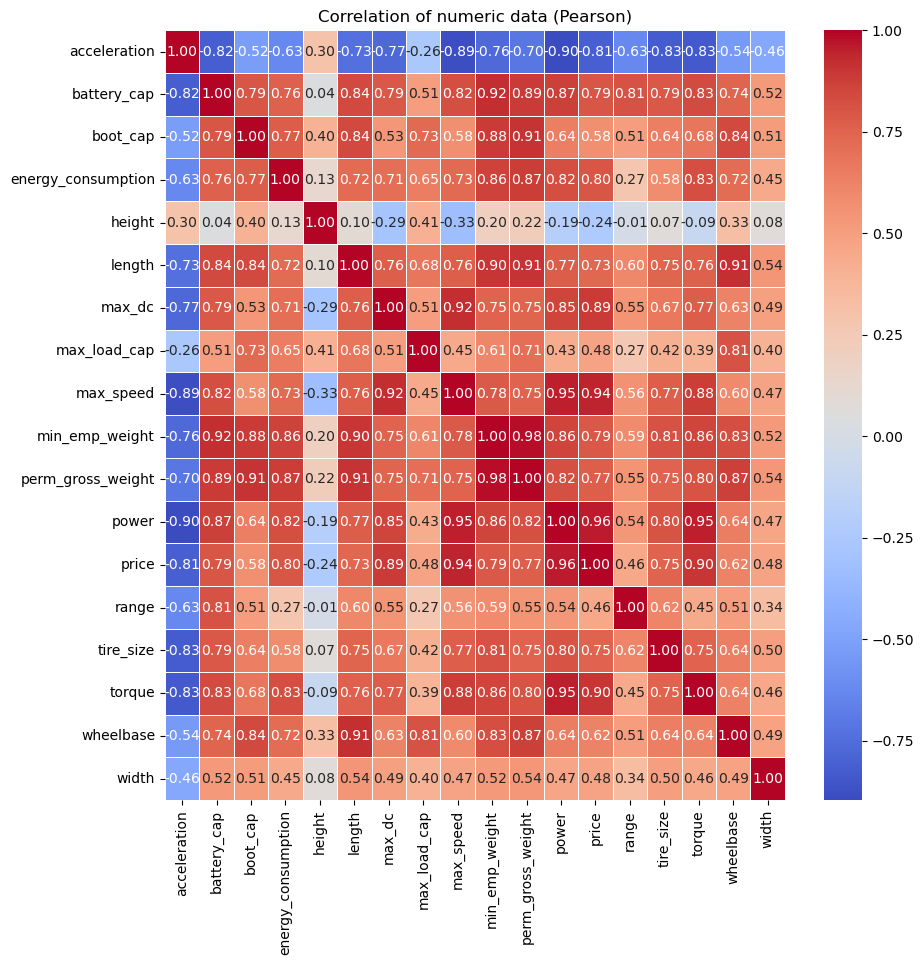

In [108]:
# Correlation of numeric data (Pearson)
correlation_matrix = df_numeric.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10,10))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)

# Rotate the y-axis labels for better visibility
plt.yticks(rotation=0)

# Set the title
plt.title('Correlation of numeric data (Pearson)')

# Display the plot
plt.show()

<p style="font-size:20px"><i>*As we can see in the plot there is a high correlation tendency between numeric variables</i></p>

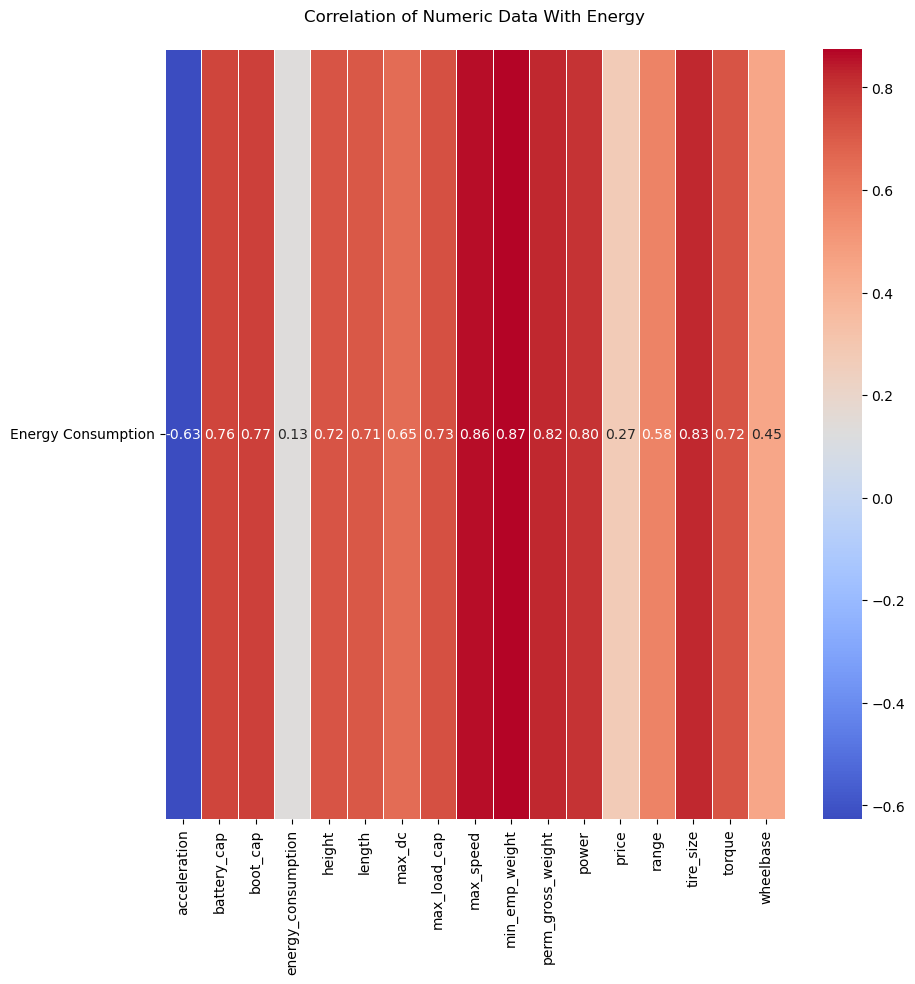

In [109]:
# Correlation of numeric data with energy
energy_cor = df_numeric.drop('energy_consumption', axis=1).corrwith(df['energy_consumption'])

# Reshape the correlation values for plotting
corr_values = np.array(energy_cor).reshape(1, -1)

# Create a DataFrame for plotting
corr_df = pd.DataFrame(corr_values, columns=df_numeric.columns[:-1], index=["Energy Consumption"])

# Set up the matplotlib figure
plt.figure(figsize=(10, 10))

# Create a heatmap using seaborn
sns.heatmap(corr_df, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)

# Rotate the y-axis labels for better visibility
plt.yticks(rotation=0)

# Set the title
plt.title('Correlation of Numeric Data With Energy', pad=20)

# Display the plot
plt.show()

<p style="font-size:20px"><i>*Many variables are highly correlated with energy consumption</i></p>

# Pre-Processing Categorical Variables

In [110]:
df_factor.head()



,brakes,drive_type,n_doors,n_seats
0,disc (front + rear),4WD,5,5
1,disc (front + rear),4WD,5,5
2,disc (front + rear),4WD,5,5
3,disc (front + rear),4WD,5,5
4,disc (front + rear),4WD,5,5


<p style="font-size:20px">Tables with the averages of energy consumption in the categorical data</p

In [111]:
# Insert energy consumption variable in the dataframe
df_factor['energy_consumption'] = df['energy_consumption']

C:\Users\mohamed\AppData\Local\Temp\ipykernel_5528\4207925793.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_factor['energy_consumption'] = df['energy_consumption']


In [112]:
# brakes
pysqldf = lambda q: sqldf(q, globals())

# SQL-like query to calculate average energy consumption grouped by 'brakes'
query = """
    SELECT brakes, ROUND(AVG(energy_consumption), 2) AS avg_energy_cons
    FROM df_factor
    GROUP BY brakes
"""

brakes_avg = pysqldf(query)
print(brakes_avg)

                       brakes  avg_energy_cons
0         disc (front + rear)            19.13
1  disc (front) + drum (rear)            16.01


In [113]:
# drive type
pysqldf = lambda q: sqldf(q, globals())

# SQL-like query to calculate average energy consumption grouped by 'drive_type'
query = """
    SELECT drive_type, ROUND(AVG(energy_consumption), 2) AS avg_energy_cons
    FROM df_factor
    GROUP BY drive_type
"""
drive_type_avg = pysqldf(query)
print(drive_type_avg)

    drive_type  avg_energy_cons
0  2WD (front)            16.37
1   2WD (rear)            16.36
2          4WD            24.22


In [114]:
# n_seats
pysqldf = lambda q: sqldf(q, globals())

# SQL-like query to calculate average energy consumption grouped by 'n_seats'
query = """
    SELECT n_seats, ROUND(AVG(energy_consumption), 2) AS avg_energy_cons
    FROM df_factor
    GROUP BY n_seats
"""
n_seats_avg = pysqldf(query)
print(n_seats_avg)

  n_seats  avg_energy_cons
0       2            16.35
1       4            18.81
2       5            18.40
3       8            25.20


In [115]:
# n_doors
pysqldf = lambda q: sqldf(q, globals())

# SQL-like query to calculate average energy consumption grouped by 'n_doors'
query = """
    SELECT n_doors, ROUND(AVG(energy_consumption), 2) AS avg_energy_cons
    FROM df_factor
    GROUP BY n_doors
"""

n_doors_avg = pysqldf(query)

print(n_doors_avg)

  n_doors  avg_energy_cons
0       3            16.55
1       4            24.36
2       5            18.09


<p style="font-size:20px">Jitter Boxplot of Categorical Variables</p

<p style="font-size:20px">Through the analysis of the plots the only categorical data that shows a good correlation with energy consumption is the drive type and we see a very similar behavior in the 2WD front and rear types except for 1 outliers in the 2WD front type.</p>

<p style="font-size:20px">To simplify the analysis both 2WD drive types will be merged due to their simmilarities.</p>

In [116]:
df_factor.columns

Index(['brakes', 'drive_type', 'n_doors', 'n_seats', 'energy_consumption'], dtype='object')

<Figure size 600x600 with 0 Axes>

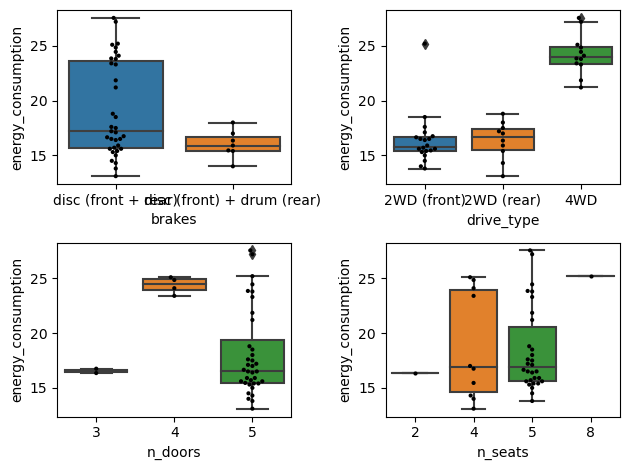

In [117]:
plt.figure(figsize=(6, 6))
fig, axes = plt.subplots(nrows=2, ncols=2)
axes = axes.flatten()
for i, col in enumerate(df_factor.columns[:-1]):
    
    sns.boxplot(x=col, y="energy_consumption", data=df_factor, ax=axes[i])
    sns.swarmplot(x=col, y="energy_consumption", data=df_factor, color="black", size=3, ax=axes[i])

plt.tight_layout()
plt.show()


C:\Users\mohamed\AppData\Local\Temp\ipykernel_5528\355076998.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_factor['drive_type'] = df_factor['drive_type'].replace({'4WD': '4WD', 'other_value': '2WD (front or rear)'})


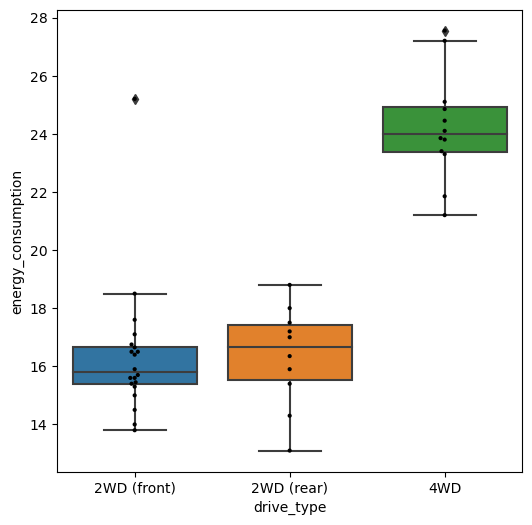

In [118]:
df_factor['drive_type'] = df_factor['drive_type'].replace({'4WD': '4WD', 'other_value': '2WD (front or rear)'})

plt.figure(figsize=(6, 6))
sns.boxplot(x='drive_type', y='energy_consumption', data= df_factor)
sns.swarmplot(x='drive_type', y='energy_consumption', data= df_factor, color="black", size=3)

plt.show()


<p style="font-size:20px">The outlier in this category will be treated with imputation of the mean value, this decision was made considering the small size of the dataset and the removal of this entry could have a considerable effect on the model</p>

In [119]:
unique_drive_types = df_factor['drive_type'].unique()

print("Unique drive types:")
print(unique_drive_types)

Unique drive types:
['4WD', '2WD (rear)', '2WD (front)']
Categories (3, object): ['2WD (front)', '2WD (rear)', '4WD']


In [120]:

filtered_data_2WD = df_factor[(df_factor['drive_type'] == '2WD (front)') | (df_factor['drive_type'] == '2WD (rear)')]

# Calculate the mean of 'energy_consumption' for the combined condition
mean_2WD_combined = filtered_data_2WD['energy_consumption'].mean()

print("Mean energy consumption for 2WD (front) or 2WD (rear):", mean_2WD_combined)

Mean energy consumption for 2WD (front) or 2WD (rear): 16.366666666666664


C:\Users\mohamed\AppData\Local\Temp\ipykernel_5528\176747081.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  mean_2WD = df_factor[df_factor['drive_type'].str.contains('2WD(front|rear)')]['energy_consumption'].mean()
C:\Users\mohamed\AppData\Local\Temp\ipykernel_5528\176747081.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_factor['energy_consumption'] = df_factor.apply(lambda row: mean_2WD if (row['drive_type'].find('2WD(front') != -1 or row['drive_type'].find('2WD(rear') != -1) and row['energy_consumption'] > 20 else row['energy_consumption'], axis=1)


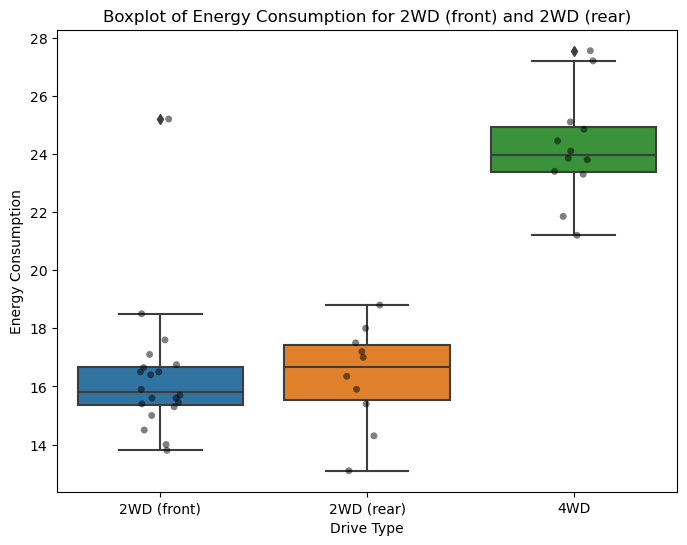

In [121]:
mean_2WD = df_factor[df_factor['drive_type'].str.contains('2WD(front|rear)')]['energy_consumption'].mean()

# Use the pandas DataFrame apply function to conditionally update 'energy_consumption'
df_factor['energy_consumption'] = df_factor.apply(lambda row: mean_2WD if (row['drive_type'].find('2WD(front') != -1 or row['drive_type'].find('2WD(rear') != -1) and row['energy_consumption'] > 20 else row['energy_consumption'], axis=1)

# Create a combined boxplot using seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x='drive_type', y='energy_consumption', data=df_factor)
sns.stripplot(x='drive_type', y='energy_consumption', data=df_factor, jitter=True, color='black', size=5, alpha=0.5)
plt.title('Boxplot of Energy Consumption for 2WD (front) and 2WD (rear)')
plt.xlabel('Drive Type')
plt.ylabel('Energy Consumption')
plt.show()

# Feature Selection

<p style="font-size:20px">First for the numerical variables it will be defined a correlation treshold of 0.5 correlation with energy consumption</p>

In [122]:
import pandas as pd

# Assuming 'data_numeric' is your DataFrame
energy_cor = df_numeric.corr()['energy_consumption']

# Find column names with absolute correlation greater than 0.5
cols_1 = energy_cor[abs(energy_cor) > 0.2].index.tolist()

print(cols_1)

['acceleration', 'battery_cap', 'boot_cap', 'energy_consumption', 'length', 'max_dc', 'max_load_cap', 'max_speed', 'min_emp_weight', 'perm_gross_weight', 'power', 'price', 'range', 'tire_size', 'torque', 'wheelbase', 'width']


<p style="font-size:20px">And looking at the variables and the correlation chart it is clear that there are many variables related to each other, so the only variable related to size will be the permissible gross weight, the only variable related to the  car electric system will be the battery capacity and the power will be the only variable related to the performance of the vehicle</p>

In [123]:
cols_1 = [col for col in cols_1 if col not in ['length', 'wheelbase', 'min_emp_weight', 
                                              'max_load_cap', 'tire_size', 'boot_cap',
                                              'torque', 'max_speed', 'acceleration',
                                              'max_dc']]

print(cols_1)

['battery_cap', 'energy_consumption', 'perm_gross_weight', 'power', 'price', 'range', 'width']


<p style="font-size:20px">And to complete the data frame for the analysis the only categorical variable to be considered will be the drive_type</p>

In [124]:
final_cols = ['drive_type'] + cols_1

print(final_cols)

['drive_type', 'battery_cap', 'energy_consumption', 'perm_gross_weight', 'power', 'price', 'range', 'width']


In [125]:
df = df[final_cols]

print(df.head())

  drive_type  battery_cap  energy_consumption  perm_gross_weight  power  \
0        4WD         95.0               24.45             3130.0    360   
1        4WD         71.0               23.80             3040.0    313   
2        4WD         95.0               27.55             3130.0    503   
3        4WD         71.0               23.30             3040.0    313   
4        4WD         95.0               23.85             3130.0    360   

    price  range  width  
0  345700    438  193.5  
1  308400    340  193.5  
2  414900    364  197.6  
3  319700    346  193.5  
4  357000    447  193.5  


In [126]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 0 to 50
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   drive_type          42 non-null     category
 1   battery_cap         42 non-null     float64 
 2   energy_consumption  42 non-null     float64 
 3   perm_gross_weight   42 non-null     float64 
 4   power               42 non-null     int64   
 5   price               42 non-null     int64   
 6   range               42 non-null     int64   
 7   width               42 non-null     float64 
dtypes: category(1), float64(4), int64(3)
memory usage: 2.8 KB


In [130]:
df['drive_type'] = df['drive_type'].astype('category')

print(df.info())
df.head(222)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 0 to 50
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   drive_type          42 non-null     category
 1   battery_cap         42 non-null     float64 
 2   energy_consumption  42 non-null     float64 
 3   perm_gross_weight   42 non-null     float64 
 4   power               42 non-null     int64   
 5   price               42 non-null     int64   
 6   range               42 non-null     int64   
 7   width               42 non-null     float64 
dtypes: category(1), float64(4), int64(3)
memory usage: 2.8 KB
None


,drive_type,battery_cap,energy_consumption,perm_gross_weight,power,price,range,width
0,4WD,95.0,24.45,3130.0,360,345700,438,193.5
1,4WD,71.0,23.80,3040.0,313,308400,340,193.5
2,4WD,95.0,27.55,3130.0,503,414900,364,197.6
3,4WD,71.0,23.30,3040.0,313,319700,346,193.5
4,4WD,95.0,23.85,3130.0,360,357000,447,193.5
5,4WD,95.0,27.20,3130.0,503,426200,369,197.6
6,2WD (rear),42.2,13.10,1730.0,170,169700,359,179.1
7,2WD (rear),42.2,14.30,1730.0,184,184200,345,179.1
8,2WD (rear),80.0,18.80,2725.0,286,282900,460,189.1
10,2WD (front),50.0,15.60,1975.0,136,159900,320,255.8


# BUILDING THE ML MODEL

<p style="font-size:20px">The method to be used in the construction of the model will be the multiple linear regression</p>

In [131]:
# Separate features (X) and target (y)
X = df.drop(['energy_consumption','price','width',"perm_gross_weight"], axis=1)  # Features
#X = df[['drive_type','range']]
y = df['energy_consumption']  # Target

# Identify categorical columns
categorical_cols = ['drive_type']  # replace 'd_drive' with the actual name of your categorical column(s)

# Create a transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'
)

# Combine preprocessing with linear regression in a pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Evaluate the model on the test data
y_pred = model.predict(X_test)

# You can use metrics like mean squared error or R-squared for evaluation
#from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.675721097667173
R-squared: 0.9523184534203555
